In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report
from sklearn import metrics


Importing data 

In [3]:
df = pd.read_csv('archive/heart.csv')

Vizualising dataset

In [5]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Adding column descriptions to refer back to throughout analysis.

Column descriptions:

Age: Age of patient 


Sex: Sex of patient (Value 0=Female
                     Value 1= Male)


Exang: Excercise induced angina (Value 1= Yes
                                 Value 0=No)

caa: Number of major vessels (0-3)


cp: Chest pain type (Value 1= typical angina,
                     Value 2= atypical angina,
                     Value 3= Non anginal pain,
                     Value 4= Asymtomati)


trtbps: resting blood pressure (in mm Hg)


chol: cholestoral in mg/dl fetched via BMI sensor


fbs : (fasting blood sugar > 120 mg/dl) (1 = True, 0 = False)



restecg : resting electrocardiographic results
                    (Value 0=  normal,
                     Value 1=  having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV),
                     Value 2= showing probable or definite left ventricular hypertrophy by Estes' criteria)



thalach : maximum heart rate achieved


old peak: ST depression induced by exercise relative to rest


slp: the slope of the peak exercise ST segment
                    (Value 0 = unsloping
                     Value 1 = flat
                     Value 2 = downsloping)


thall: thalassemia
                    (Value 0 = null
                     Value 1 = fixed defect
                     Value 2 = normal
                     Value 3 = reversable defect)

                     
output: diagnosis of heart disease
                    (Value 0: < 50% diameter narrowing. less chance of heart disease
                     Value 1: > 50% diameter narrowing. more chance of heart disease) 
target : 0= less chance of heart attack 1= more chance of heart attack

Checking statistical information for the dataset

In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.shape

(303, 14)

Data Cleaning 

Checking dataset for unique values

In [9]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

Checking for null values 

In [47]:
df.isnull().mean()*100

age         0.0
sex         0.0
cp          0.0
trtbps      0.0
chol        0.0
fbs         0.0
restecg     0.0
thalachh    0.0
exng        0.0
oldpeak     0.0
slp         0.0
caa         0.0
thall       0.0
output      0.0
dtype: float64

Exploratory Data analysis

Vizualizing Catagorical and Continuious variables

Splitting variables into three catagpries:
Catagorical variables
Continuious variables
Target variable

In [74]:
cat_var = ['sex', 'cp' , 'exng' , 'slp', 'caa', 'thall', 'fbs', 'restecg', ]
cont_var = ['age', 'trtbps', 'chol' , 'thalachh',  'oldpeak' ]
target = ['output']

Vizulizasing output of the catagoricial variables

<AxesSubplot:xlabel='sex', ylabel='count'>

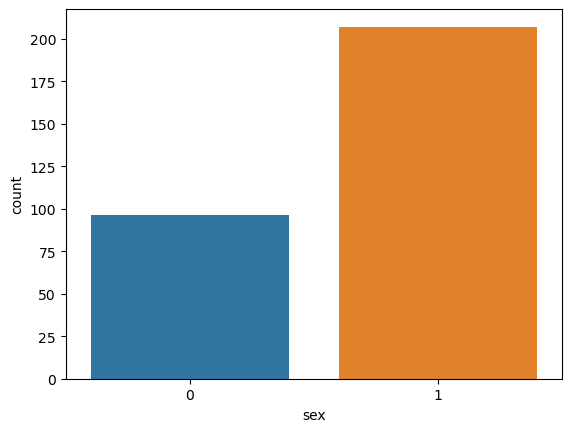

In [11]:
sns.countplot(x=df['sex'])

<AxesSubplot:xlabel='cp', ylabel='count'>

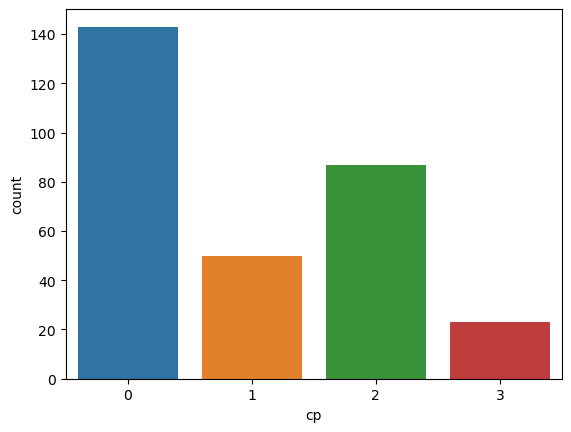

In [12]:
sns.countplot(x=df['cp'])


<AxesSubplot:xlabel='exng', ylabel='count'>

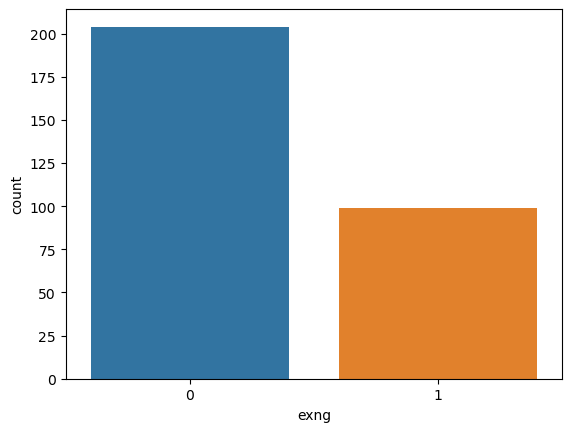

In [13]:
sns.countplot(x=df['exng'])

<AxesSubplot:xlabel='slp', ylabel='count'>

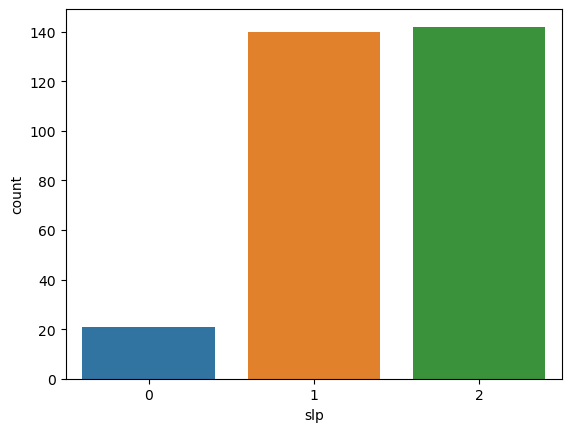

In [14]:
sns.countplot(x=df['slp'])

<AxesSubplot:xlabel='caa', ylabel='count'>

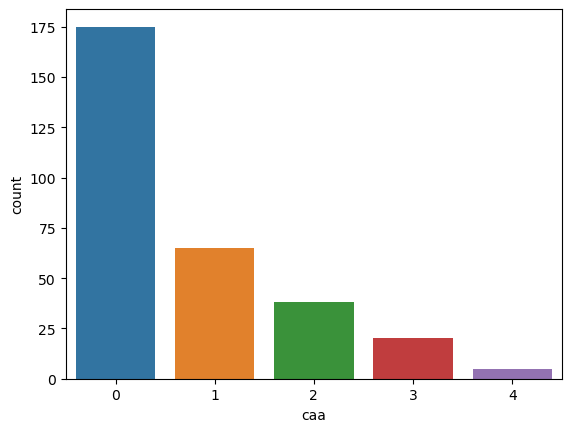

In [15]:
sns.countplot(x=df['caa'])

<AxesSubplot:xlabel='thall', ylabel='count'>

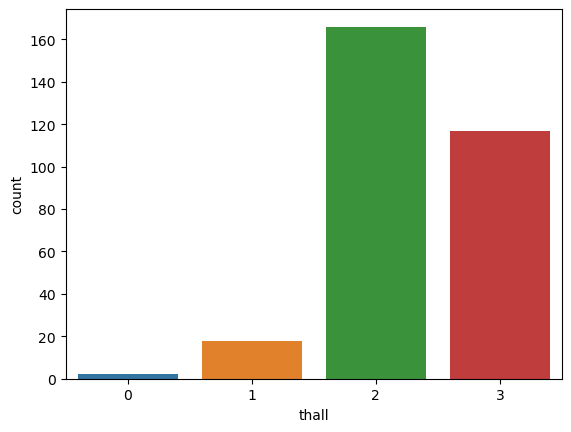

In [16]:
sns.countplot(x=df['thall'])


<AxesSubplot:xlabel='fbs', ylabel='count'>

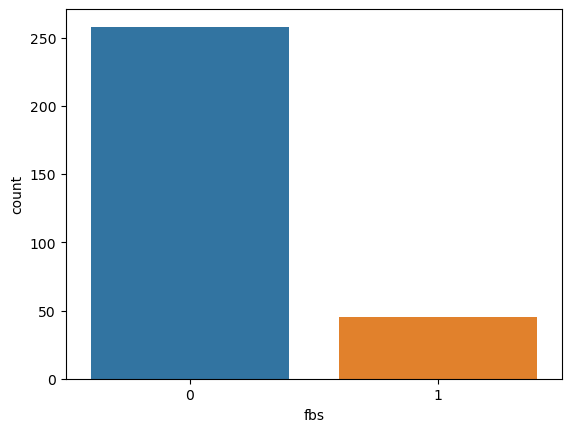

In [66]:
sns.countplot(x=df['fbs'])

<AxesSubplot:xlabel='restecg', ylabel='count'>

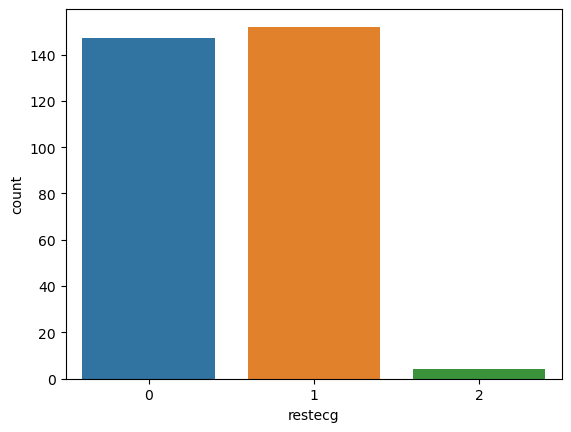

In [76]:
sns.countplot(x=df['restecg'])

Vizulaizing the distribution of the continuious variables 

<AxesSubplot:xlabel='age', ylabel='Count'>

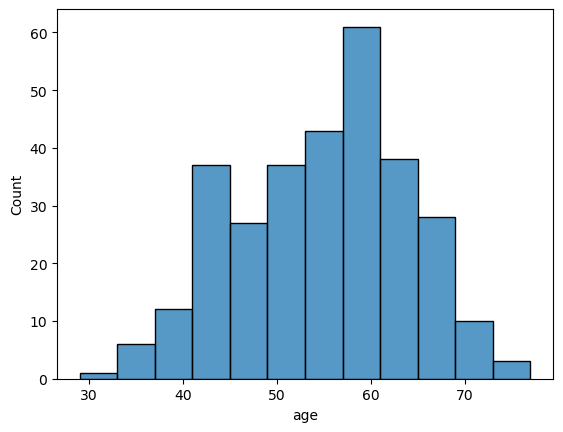

In [17]:
sns.histplot(x=df['age'])

As stated in the datatsets statistical information the minimum age is 29 and the maximum age is 61.

<AxesSubplot:xlabel='trtbps', ylabel='Count'>

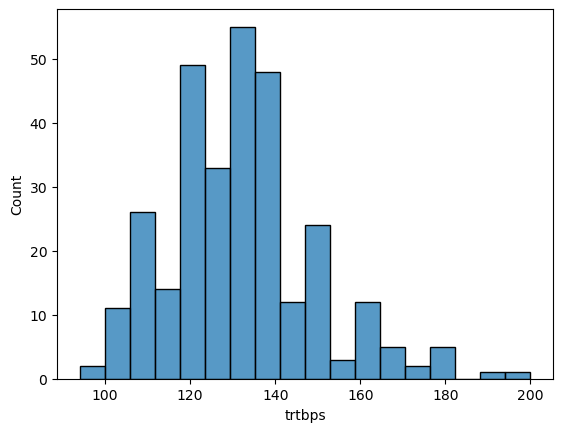

In [18]:
sns.histplot(x=df['trtbps'])

As stated in the datatsets statistical information the minmum resting bloodpressure is 94Hg and the maximum resting bloodpressue is 564.

<AxesSubplot:xlabel='chol', ylabel='Count'>

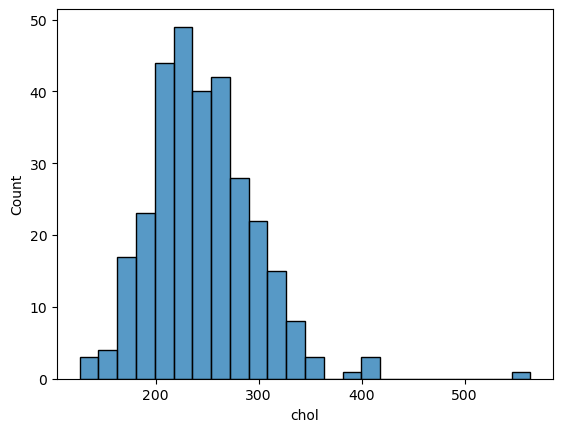

In [19]:
sns.histplot(x=df['chol'])

As stated in the datatsets statistical information the minmum cholestoral is 126mg/dl and the maximum cholestoral is 564mg/dl.

<AxesSubplot:xlabel='restecg', ylabel='Count'>

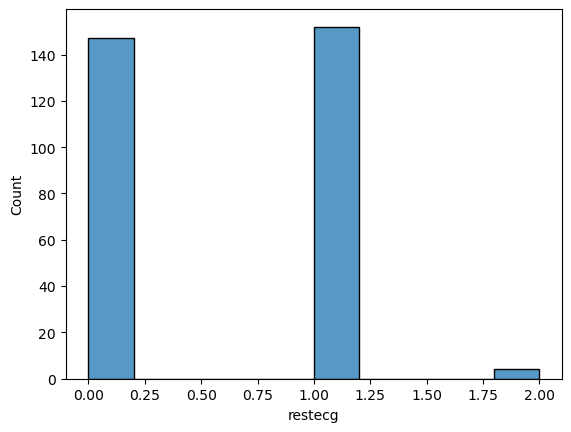

In [21]:
sns.histplot(x=df['restecg'])

As stated in the datatsets statistical information the minmum resting electrocardiographic value is 0 and the maximum resting electrocardiographic value is 2.

<AxesSubplot:xlabel='fbs', ylabel='Count'>

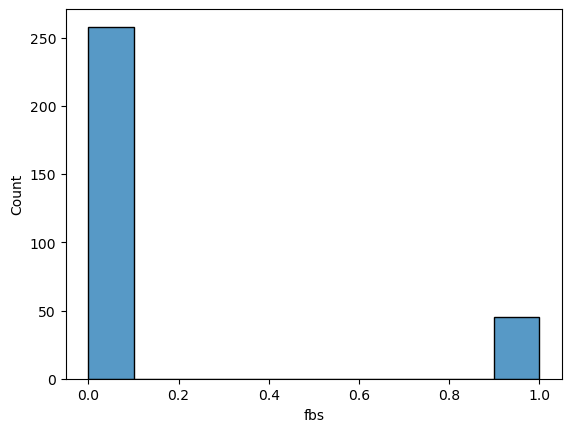

In [70]:
sns.histplot(x=df['fbs'])

As stated in the datatsets statistical information the minmum fasting blood sugar < 120 mg/dl value is 0 and the maximum fasting blood sugar > 120 mg/dl value is 1.

<AxesSubplot:xlabel='thalachh', ylabel='Count'>

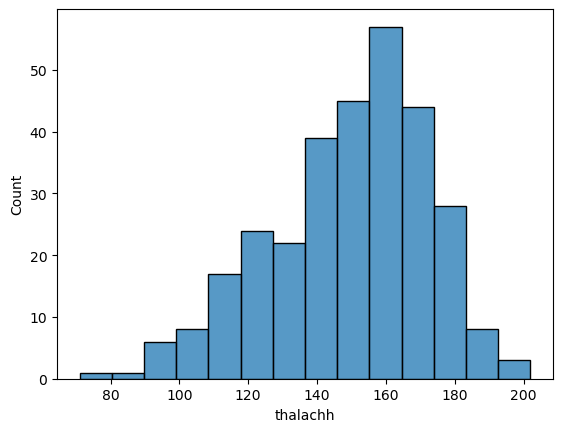

In [22]:
sns.histplot(x=df['thalachh'])

As stated in the datatsets statistical information the minimum heart rate achieved value is 71 and the maximum maximum heart rate achieved value is 202.

<AxesSubplot:xlabel='oldpeak', ylabel='Count'>

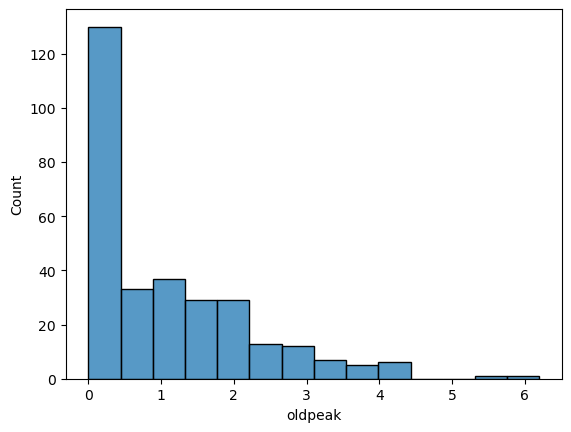

In [23]:
sns.histplot(x=df['oldpeak'])


As stated in the datatsets statistical information the minimum ST depression induced by exercise relative to rest value is 0 and the maximum maximum ST depression induced by exercise relative to rest value is 6.2.

Vizualizing the ouptut of the target variable.

<AxesSubplot:xlabel='output', ylabel='count'>

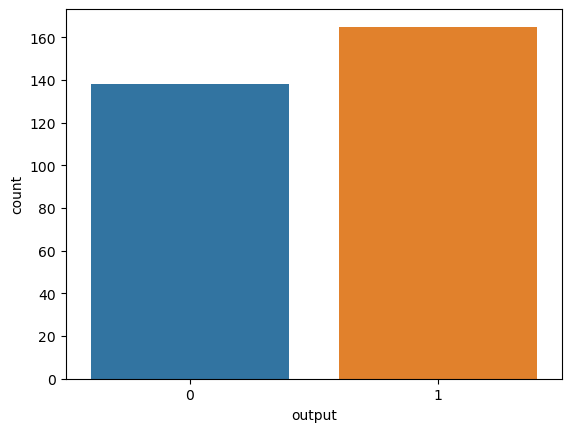

In [48]:
sns.countplot(x=df['output'])

Vizualizing relationship between target variable catagorical feature variables.

<AxesSubplot:xlabel='sex', ylabel='count'>

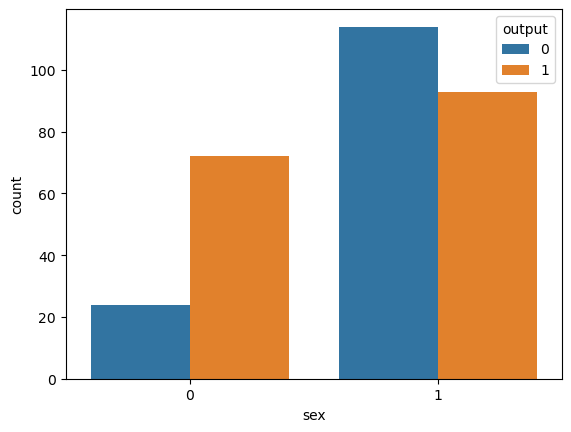

In [52]:
sns.countplot(data=df, x="sex", hue="output")

Male patients are more likely to recieve a diagnosis of heart disease. 

<AxesSubplot:xlabel='cp', ylabel='count'>

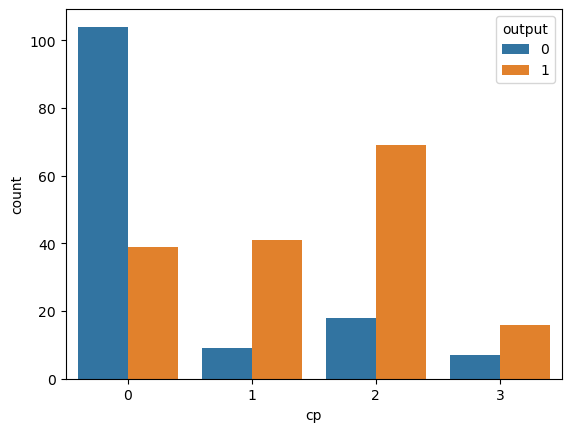

In [53]:
sns.countplot(data=df, x="cp", hue="output")

Patients with a typical agina chest pain type are more likely to recieve a diagnosis of heart disease.

<AxesSubplot:xlabel='exng', ylabel='count'>

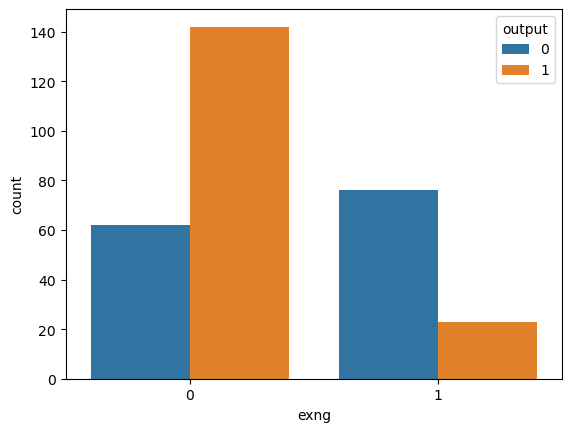

In [54]:
sns.countplot(data=df, x="exng", hue="output")

Patients without excercise induced angina are more likely to recieve a diagnosis of heart disease.

<AxesSubplot:xlabel='slp', ylabel='count'>

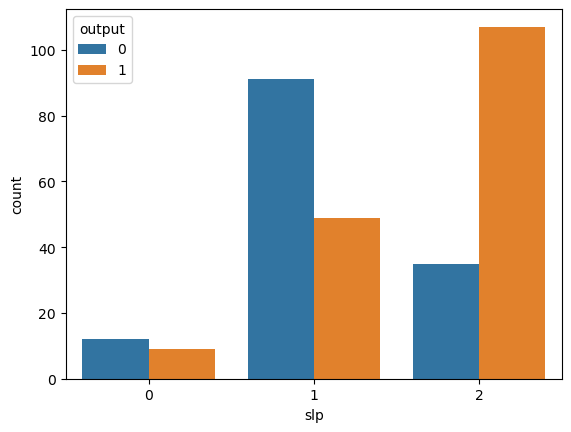

In [55]:
sns.countplot(data=df, x="slp", hue="output")

Patients with downsloping slope of the peak exercise ST segment are more likely to recieve a diagnosis of heart faliure.

<AxesSubplot:xlabel='caa', ylabel='count'>

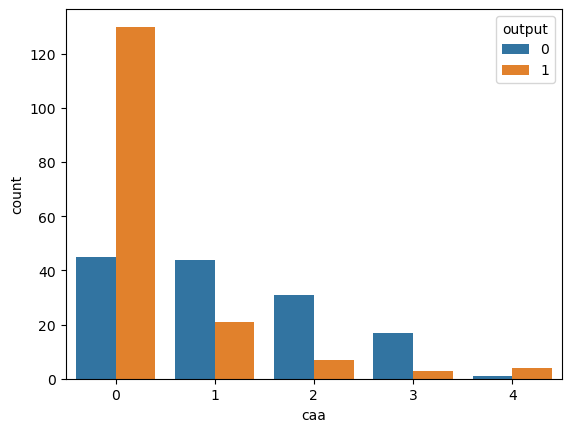

In [56]:
sns.countplot(data=df, x="caa", hue="output")

Patients with a number of 0 majour vessels are more likely recieve a diagnosis of heart faliure.

<AxesSubplot:xlabel='thall', ylabel='count'>

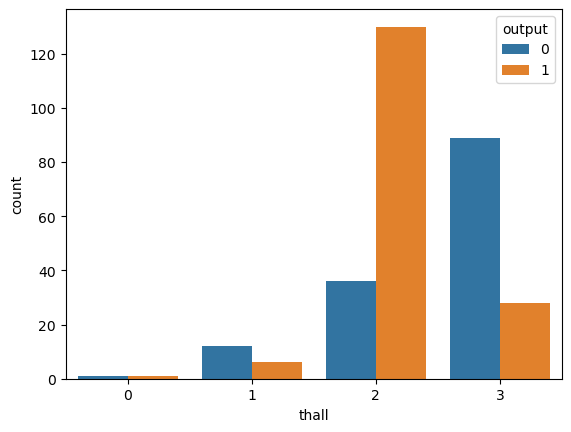

In [58]:
sns.countplot(data=df, x="thall", hue="output")

Patients with normal thalassemia are more likely to recieve a diagnosis of heart disease.

<AxesSubplot:xlabel='fbs', ylabel='count'>

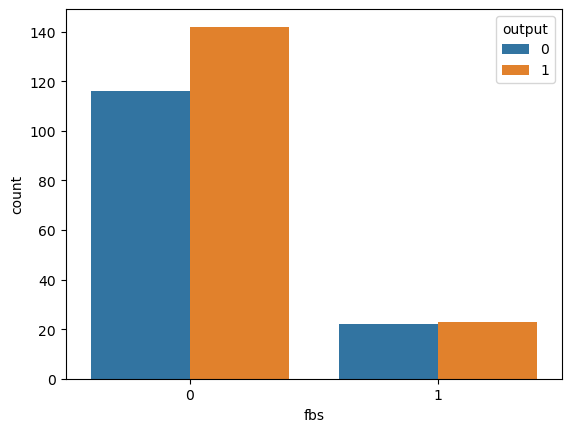

In [64]:
sns.countplot(data=df, x="fbs", hue="output")


Patients with a fasting blood sugar < 120 mg/dl are more likely to be diagnosed with heart disease.

Vizulazing relationship between target variable continuious feature variables 

In [ ]:
cont_var = ['age', 'trtbps', 'chol', 'fbs','restecg' ,  'thalachh',  'oldpeak' ]

<AxesSubplot:xlabel='output', ylabel='age'>

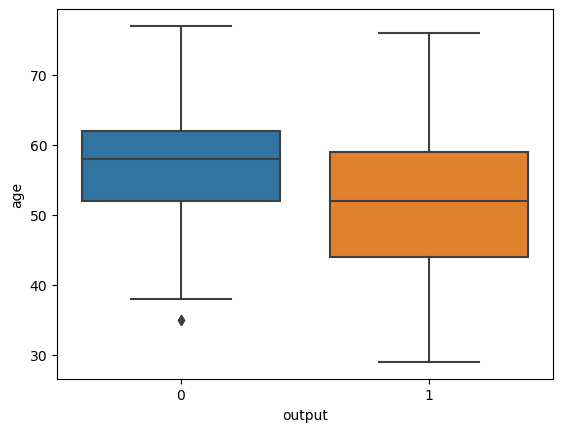

In [24]:
sns.boxplot(x=df['output'], y=df['age'])

<AxesSubplot:xlabel='output', ylabel='trtbps'>

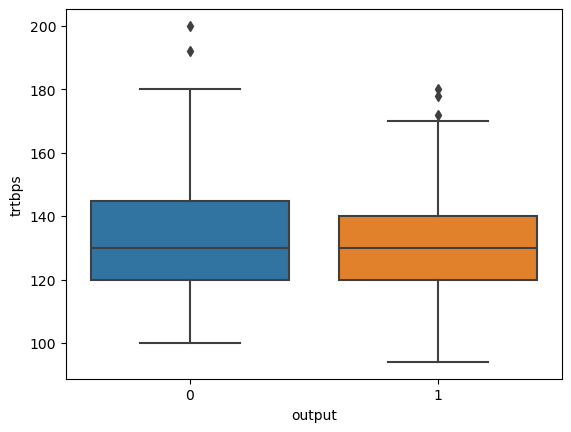

In [60]:
sns.boxplot(x=df['output'], y=df['trtbps'])

<AxesSubplot:xlabel='output', ylabel='chol'>

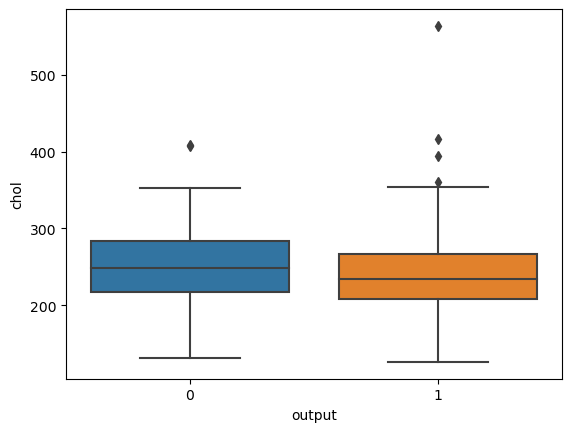

In [61]:
sns.boxplot(x=df['output'], y=df['chol'])

<AxesSubplot:xlabel='output', ylabel='restecg'>

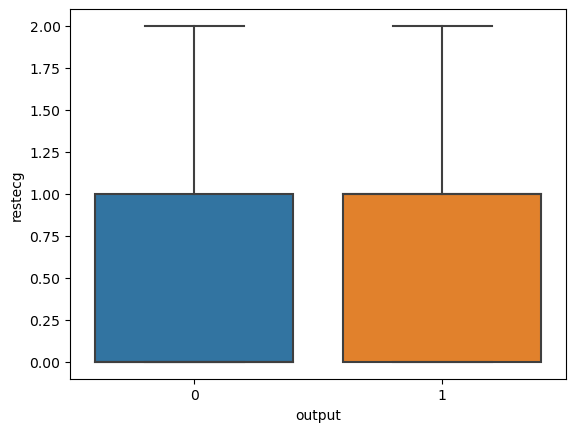

In [63]:
sns.boxplot(x=df['output'], y=df['restecg'])


<AxesSubplot:xlabel='output', ylabel='thalachh'>

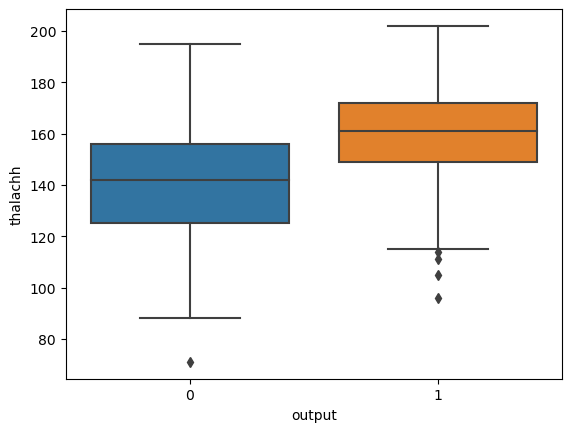

In [27]:
sns.boxplot(x=df['output'], y=df['thalachh'])


<AxesSubplot:xlabel='output', ylabel='oldpeak'>

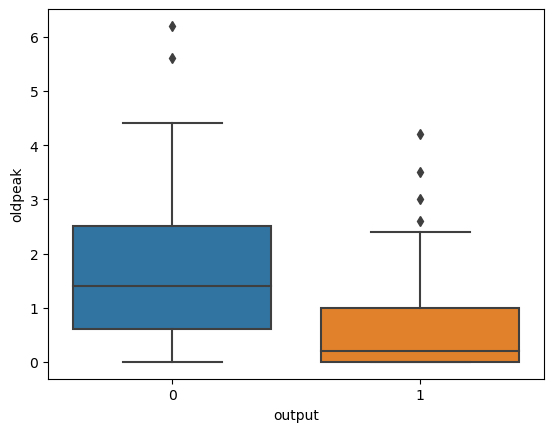

In [28]:
sns.boxplot(x=df['output'], y=df['oldpeak'])

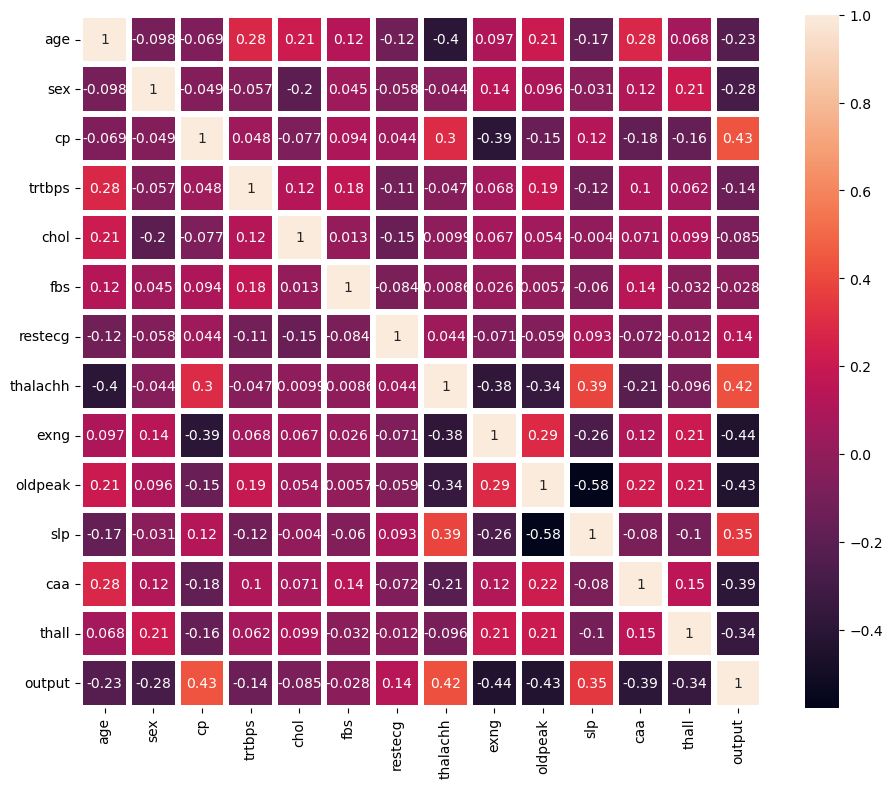

In [29]:
f, ax = plt.subplots(figsize=(11,9))
cor = sns.heatmap(df.corr(), annot=True, linewidth=4)
plt.show()

No features are highly correlated with eachother.

Modelling - Logistic regression

In [30]:
X = df[['sex', 'cp' , 'exng' , 'slp', 'caa', 'thall', 'age', 'trtbps', 'chol', 'fbs','restecg' ,  'thalachh',  'oldpeak']]
y = df['output'].values.reshape(-1,1)

In [31]:
y = y.reshape(-1, )

In [32]:
y.shape

(303,)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

Feature Scaling

In [34]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [68]:
log = LogisticRegression(random_state=16)
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

Model Evaluation

In [36]:
target_cols = ['Without Disease', 'With Disease']
print(classification_report(y_test, y_pred, target_names=target_cols))

                 precision    recall  f1-score   support

Without Disease       0.89      0.80      0.85        41
   With Disease       0.79      0.89      0.84        35

       accuracy                           0.84        76
      macro avg       0.84      0.85      0.84        76
   weighted avg       0.85      0.84      0.84        76



Model accuracy is 84%

In [37]:
cnf_mtx = metrics.confusion_matrix(y_test, y_pred)
cnf_mtx

array([[33,  8],
       [ 4, 31]])

Viszualizing Model results

Text(0.5, 427.9555555555555, 'Predicted label')

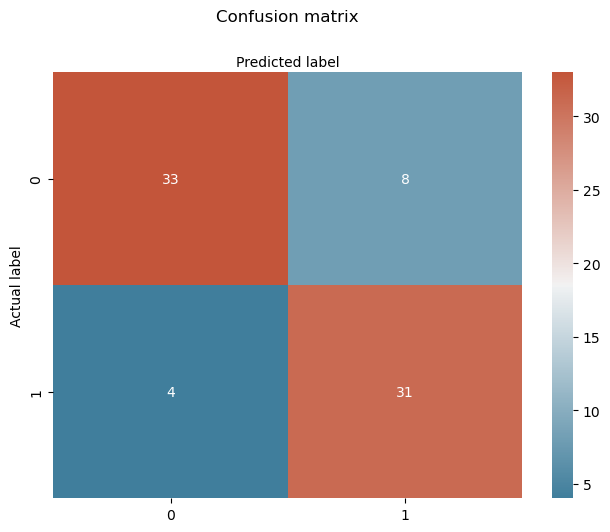

In [38]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(pd.DataFrame(cnf_mtx), annot=True, cmap=cmap,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')